In [5]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/fs_val_v3 .

In [ ]:
# Creating original images
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as transforms

# Load the npz file
data = np.load('/content/fs_val_v3/fishyscapes_annotations/0000_frankfurt_000001_046504_rgb.npz')['rgb'].astype(int)

# Load the base image using PIL and convert to a tensor
base_image_path = "/content/fs_val_v3/cityscapes_orig/frankfurt_000001_046504_leftImg8bit.png"
base_image = Image.open(base_image_path).convert('RGB')

# Define the transform to convert PIL image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to tensor in range [0, 1]
])

# Apply the transform and convert to 'int' type
base_image_tr = transform(base_image) * 255  # Rescale to [0, 255]
base_image_tr = base_image_tr.type(torch.int)

# Ensure overlay_image is also a tensor with the same type
overlay_image = torch.tensor(data, dtype=torch.int)

print(base_image_tr.shape)  # 3, 1024, 2048
print(overlay_image.shape)  # 1024, 2048, 3

overlay_image = overlay_image.permute(2, 0, 1) # 3, 1024, 2048
print(overlay_image.shape)  # 3, 1024, 2048


# Add the base image and overlay image, clip the values, and convert to 'uint8'
combined_image = torch.clamp(base_image_tr + overlay_image, 0, 255).type(torch.uint8)
print(combined_image.shape, combined_image.min(), combined_image.max()) # 3, 1024, 2048

# Convert the tensor back to PIL image for visualization if needed
combined_image_pil = transforms.ToPILImage()(combined_image)


torch.Size([3, 1024, 2048])
torch.Size([1024, 2048, 3])
torch.Size([3, 1024, 2048])
torch.Size([3, 1024, 2048]) tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)


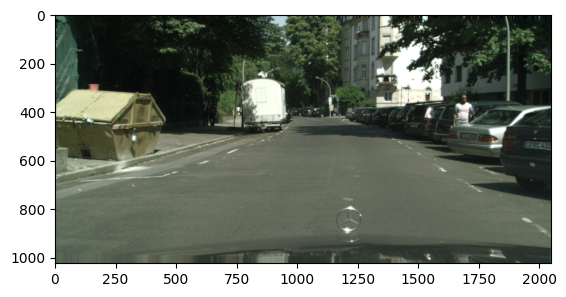

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(base_image)

torch.Size([3, 1024, 2048]) tensor([ 1,  2,  3,  4,  7,  8, 11, 12, 13, 17, 20, 21, 23, 24, 26, 29],
       dtype=torch.uint8)


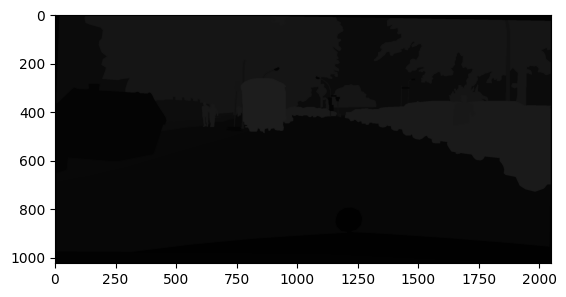

In [ ]:
# # Original Label
# from PIL import Image
# import torch
# from torchvision import transforms as tvt

# mask = Image.open('/content/frankfurt_000001_046504_gtFine_labelIds.png').convert('RGB')
# plt.imshow(mask)
# transforms = tvt.PILToTensor()
# mask = transforms(mask)
# print(mask.shape, torch.unique(mask))

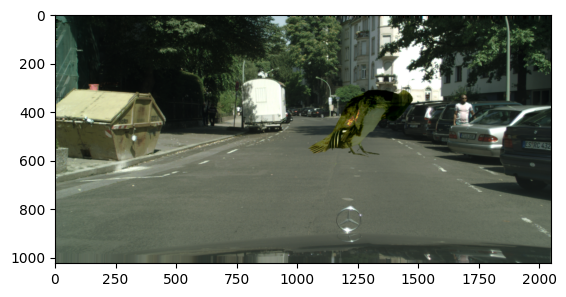

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(combined_image_pil)

torch.Size([3, 1024, 2048]) tensor([  0,   1, 255], dtype=torch.uint8)


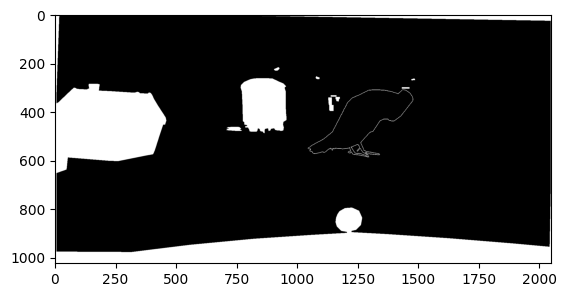

In [ ]:
# Generate label of overlayed image
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms as tvt

mask = Image.open('/content/fs_val_v3/fishyscapes_annotations/0000_frankfurt_000001_046504_labels.png').convert('RGB')
plt.imshow(mask)
transforms = tvt.PILToTensor()
mask = transforms(mask)
print(mask.shape, torch.unique(mask))


In [ ]:
!mkdir /content/fs_val_v3/fishyscapes_images

In [ ]:
## !rm -rf /content/fs_val_v3/fishyscapes_images

In [ ]:
import os
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as transforms


# Define paths
fs_val_v3_path = '/content/fs_val_v3'
cityscapes_orig_path = '/content/fs_val_v3/cityscapes_orig'
fishyscapes_labels_path = '/content/fs_val_v3/fishyscapes_annotations'
fishyscapes_images_path = '/content/fs_val_v3/fishyscapes_images'

# Create output directory if it doesn't exist
os.makedirs(fishyscapes_images_path, exist_ok=True)

# Define the transform to convert PIL image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to tensor in range [0, 1]
])

# Iterate through the files in fs_val_v3_path
for file in os.listdir(fishyscapes_labels_path):
    if file.endswith('_rgb.npz'):
        # Load the npz file
        npz_path = os.path.join(fishyscapes_labels_path, file)
        data = np.load(npz_path)['rgb'].astype(int)

        # Get the base image corresponding to the npz file
        image_identifier = file.split('_', 1)[1].replace('_rgb.npz', '_leftImg8bit.png')
        # print(image_identifier)
        base_image_path = os.path.join(cityscapes_orig_path, image_identifier)
        # print(base_image_path)

        if os.path.exists(base_image_path):
            # Load the base image using PIL and convert to a tensor
            base_image = Image.open(base_image_path).convert('RGB')
            base_image_tr = transform(base_image) * 255  # Rescale to [0, 255]
            base_image_tr = base_image_tr.type(torch.int)

            # Ensure overlay_image is also a tensor with the same type
            overlay_image = torch.tensor(data, dtype=torch.int)
            overlay_image = overlay_image.permute(2, 0, 1)  # Convert to 3, 1024, 2048

            # Add the base image and overlay image, clip the values, and convert to 'uint8'
            combined_image = torch.clamp(base_image_tr + overlay_image, 0, 255).type(torch.uint8)

            # Convert the tensor back to PIL image for visualization if needed
            combined_image_pil = transforms.ToPILImage()(combined_image)
            plt.imshow(combined_image_pil)
            plt.show()
            # Save the combined image
            combined_image_name = file.replace('_rgb.npz', '_leftImg8bit.png')
            combined_image_path = os.path.join(fishyscapes_images_path, combined_image_name)
            combined_image_pil.save(combined_image_path)

            print(f"Saved {combined_image_path}")
        else:
            print(f"Base image not found: {base_image_path}")



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_fishyscapes_dataset_dict(data_root):
    dataset_dict = {"image": [], "mask": [], "image_name": []}

    image_dir = os.path.join(data_root, "fishyscapes_images")
    annotation_dir = os.path.join(data_root, "fishyscapes_annotations")

    # Iterate over cities and images in the split
    for image_file in os.listdir(image_dir):
        # print(image_file)  # 0020_frankfurt_000001_067735_leftImg8bit.png
        image_path = os.path.join(image_dir, image_file)
        # Name
        if image_file.endswith("_leftImg8bit.png"):
            image_name = image_file.replace("_leftImg8bit.png", "")
            print(image_name)  # 0020_frankfurt_000001_067735
        # annotations
        annotation_file = image_file.replace("_leftImg8bit.png", "_labels.png")
        annotation_path = os.path.join(annotation_dir, annotation_file)

        # creating the dict
        dataset_dict["image"].append(image_path)
        dataset_dict["mask"].append(annotation_path)
        dataset_dict["image_name"].append(image_name)
    return dataset_dict


# Create DatasetDict for lostandfound
data_root = '/content/fs_val_v3'
fishyscapes_dataset_dict = create_fishyscapes_dataset_dict(data_root)

print(fishyscapes_dataset_dict.keys())

def create_dataset(image_paths, masks, image_names):
    dataset = Dataset.from_dict({"image": image_paths,
                                "mask": masks,
                                "image_name": image_names
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("mask", Image())
    return dataset


test_dict = {k: [x for i, x in enumerate(v)] for k, v in fishyscapes_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"],
                               test_dict["mask"],
                               test_dict["image_name"],
                              )

dataset = DatasetDict({
    "data": test_dataset
})

0020_frankfurt_000001_067735
0002_frankfurt_000001_031266
0001_frankfurt_000000_007365
0006_frankfurt_000001_038645
0028_frankfurt_000001_073243
0019_frankfurt_000001_080830
0009_frankfurt_000001_043395
0023_frankfurt_000000_011810
0017_frankfurt_000001_065850
0027_frankfurt_000001_054884
0008_frankfurt_000001_066574
0022_frankfurt_000001_028232
0000_frankfurt_000001_046504
0016_frankfurt_000000_007365
0004_frankfurt_000001_037705
0015_frankfurt_000000_017476
0021_frankfurt_000001_015768
0011_frankfurt_000001_024927
0025_frankfurt_000000_021667
0007_frankfurt_000001_035864
0012_frankfurt_000000_011810
0024_frankfurt_000001_030310
0018_frankfurt_000001_070099
0014_frankfurt_000001_073243
0013_frankfurt_000001_012699
0010_frankfurt_000001_019854
0026_frankfurt_000000_011007
0003_frankfurt_000001_034047
0029_frankfurt_000001_034816
0005_frankfurt_000001_070099
dict_keys(['image', 'mask', 'image_name'])


In [ ]:
dataset, dataset["data"].features

(DatasetDict({
     data: Dataset({
         features: ['image', 'mask', 'image_name'],
         num_rows: 30
     })
 }),
 {'image': Image(mode=None, decode=True, id=None),
  'mask': Image(mode=None, decode=True, id=None),
  'image_name': Value(dtype='string', id=None)})

In [ ]:
dataset["data"][4]["image"]

Output hidden; open in https://colab.research.google.com to view.

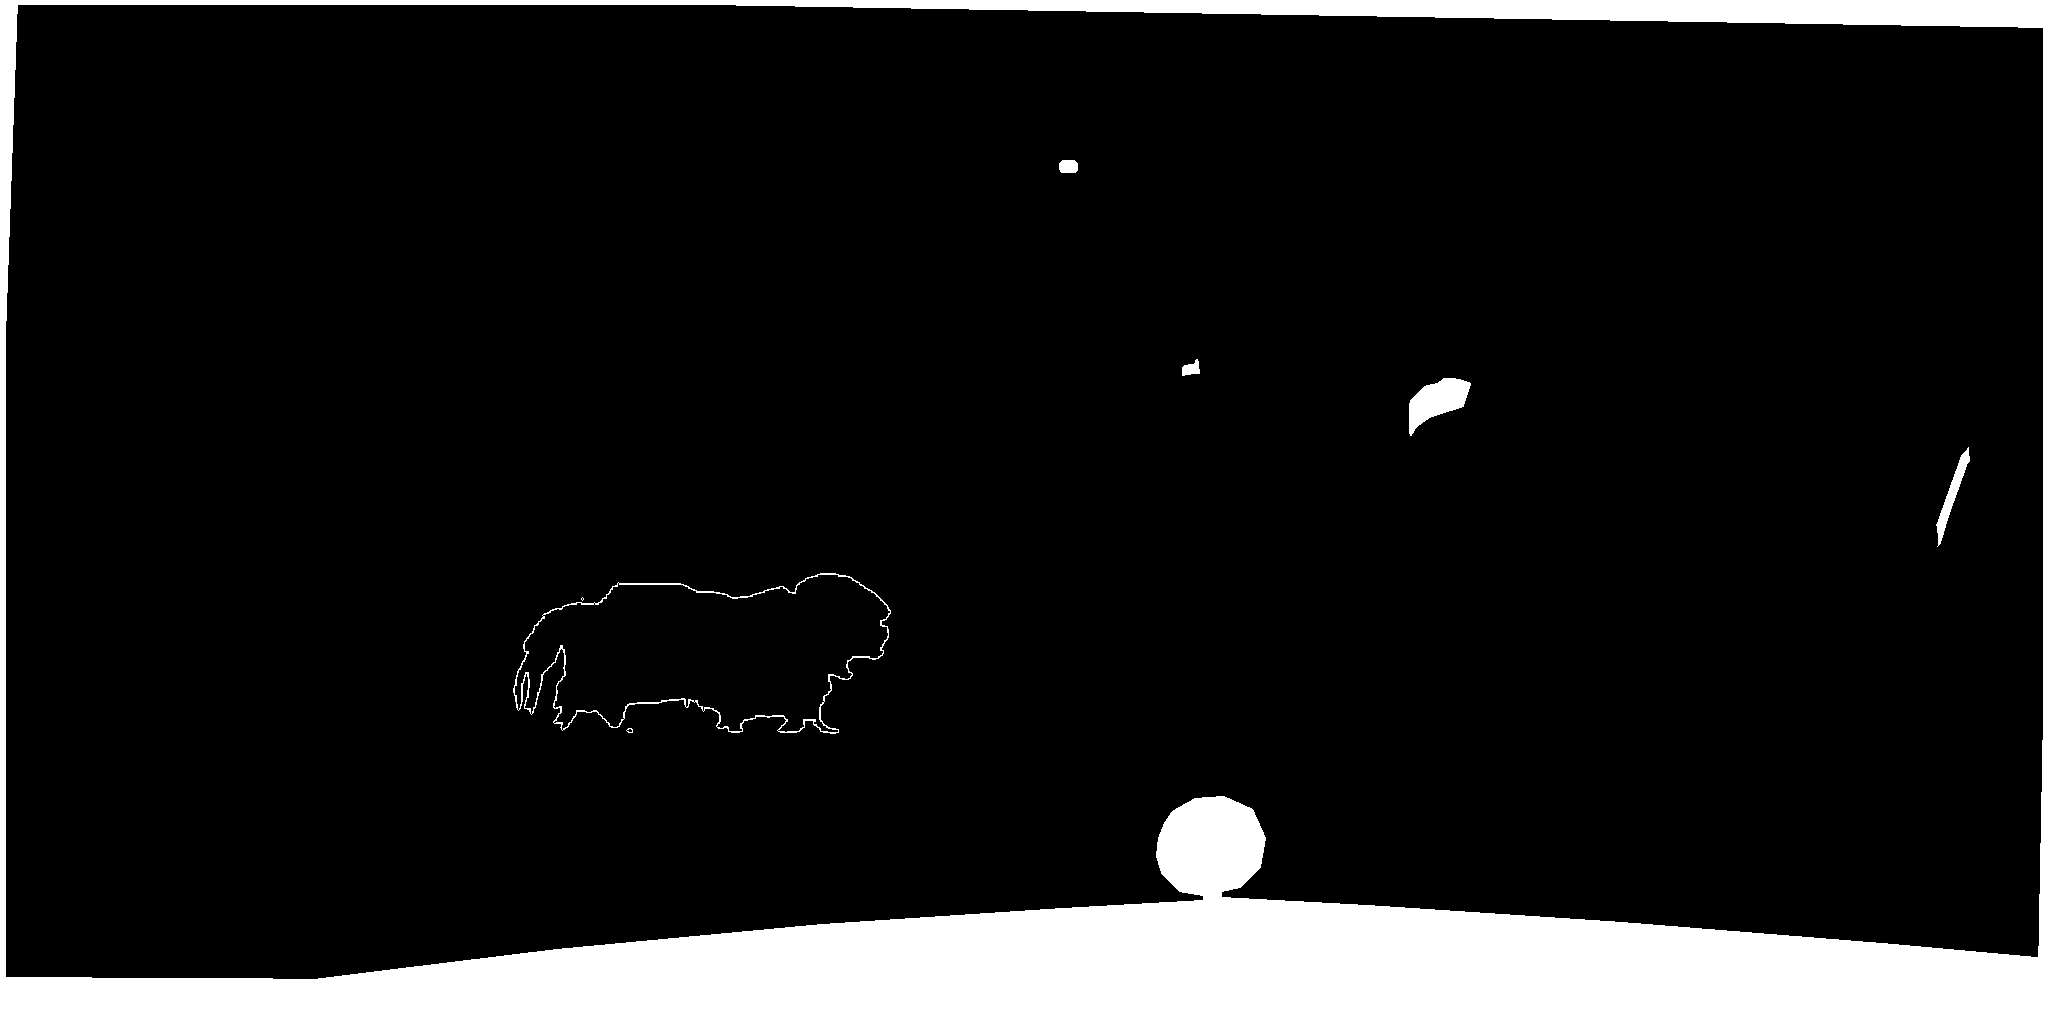

In [ ]:
dataset["data"][4]["mask"]

In [ ]:
dataset["data"][1]["image_name"]

'0002_frankfurt_000001_031266'

In [ ]:
import numpy as np
np.unique(np.array(dataset["data"][2]["mask"]))

array([  0,   1, 255], dtype=uint8)

In [ ]:
dataset["data"][8]["image"]

Output hidden; open in https://colab.research.google.com to view.

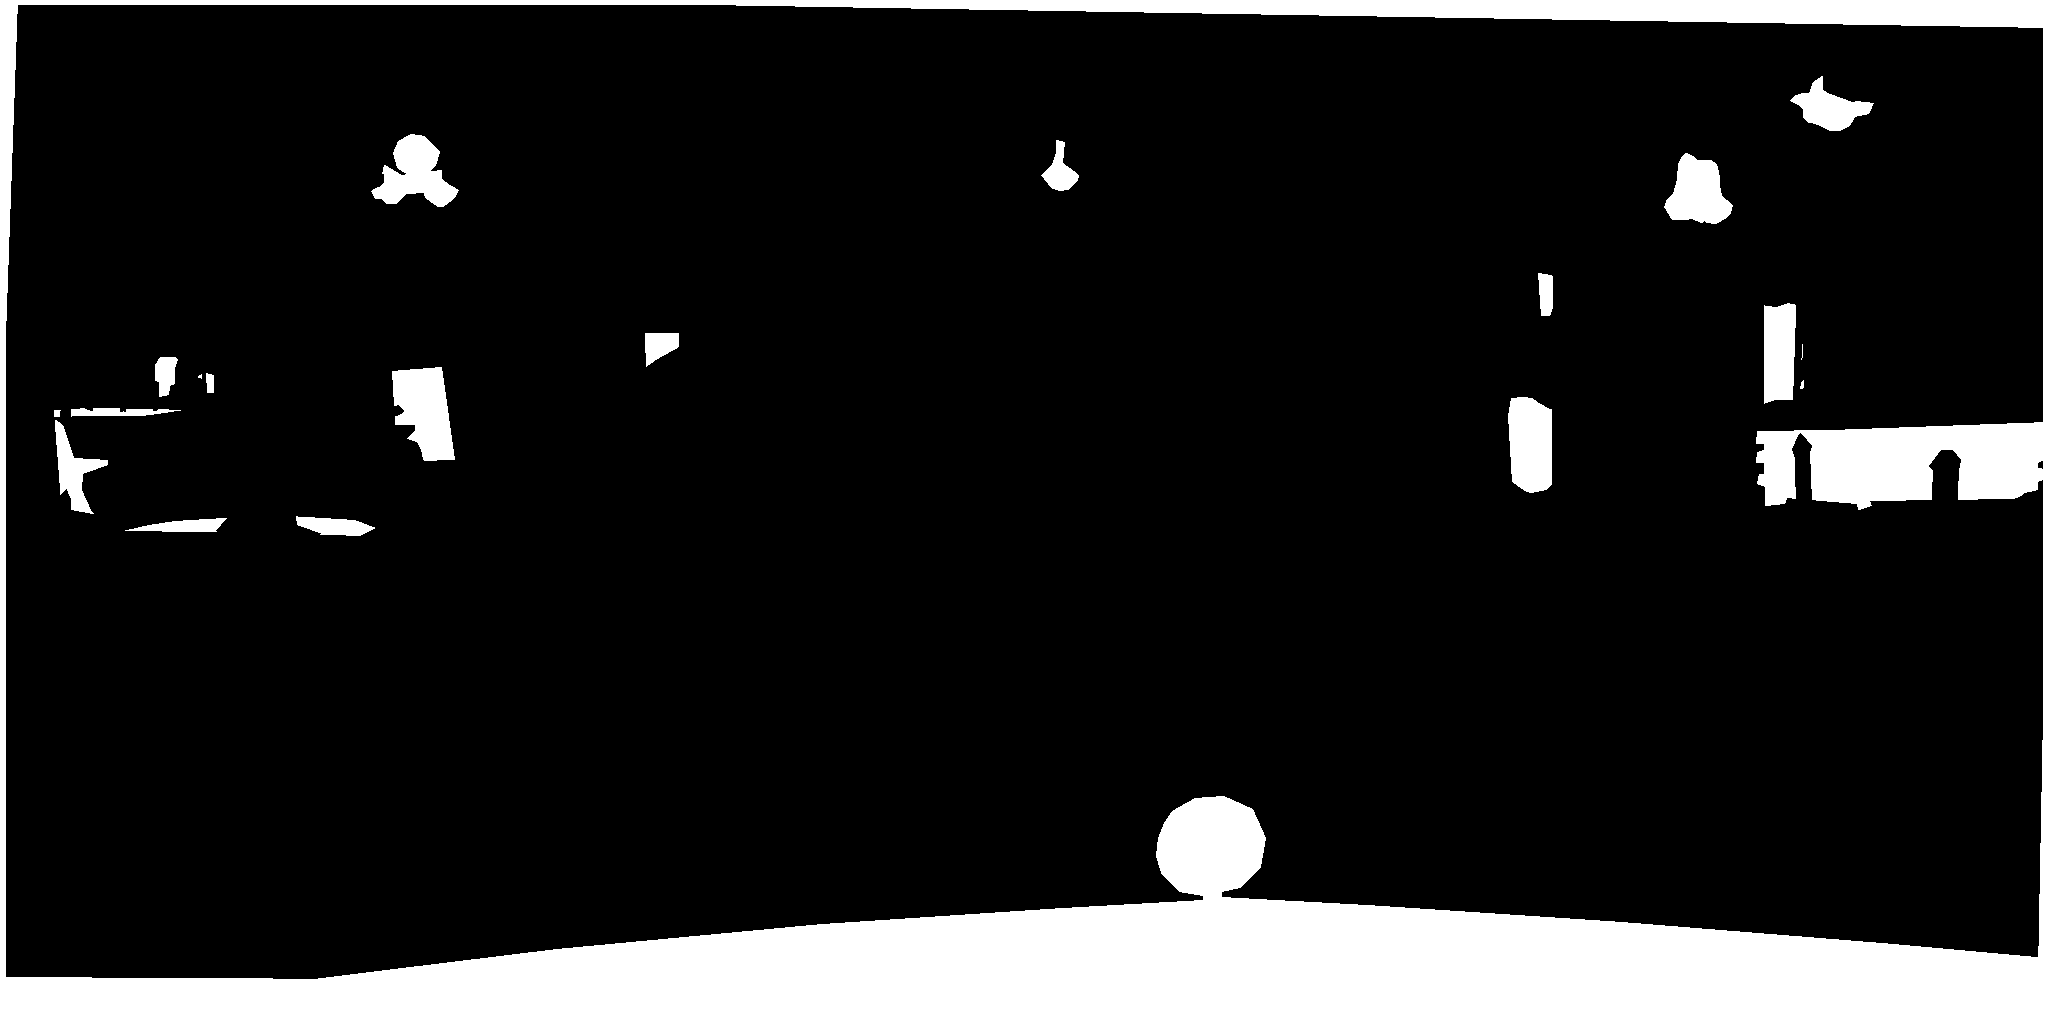

In [ ]:
dataset["data"][8]["mask"]

In [ ]:
import numpy as np
np.unique(np.array(dataset["data"][8]["mask"]))

array([  0, 255], dtype=uint8)

In [2]:
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('HF_TOKEN'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [1]:
# Push to the Hugging Face Model Hub
# dataset.push_to_hub("BhavanaMalla/fishyscapes-semantic", private=True, token="yourtoken")

NameError: name 'dataset' is not defined

In [3]:
import datasets, transformers
from datasets import load_dataset

fishyscapes = load_dataset("BhavanaMalla/fishyscapes-semantic")

Generating data split:   0%|          | 0/30 [00:00<?, ? examples/s]

In [ ]:
fishyscapes

DatasetDict({
    data: Dataset({
        features: ['image', 'mask', 'image_name'],
        num_rows: 30
    })
})

In [ ]:
import numpy as np

total_label = []
for i in range(30):
    unique_labels = np.unique(np.array(fishyscapes["data"][i]["mask"])).tolist()
    # print(fishyscapes["data"][i]["image_name"])
    total_label.extend(unique_labels)
set(total_label)

{0, 1, 255}

In [ ]:
import numpy as np
unique_list = []
for i in range(30):
    unique_list.extend(np.array(fishyscapes["data"][i]["image"]).shape)

set(unique_list)

{3, 1024, 2048}

In [6]:
import numpy as np
import torch

for i in range(30):
    print(np.array(fishyscapes["data"][i]["image"]).shape)

(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)
(1024, 2048, 3)


In [ ]:
import numpy as np
unique_list = []
for i in range(30):
    unique_list.extend(np.array(fishyscapes["data"][i]["mask"]).shape)

set(unique_list)

{1024, 2048}

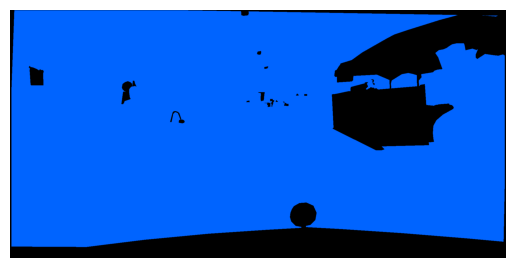

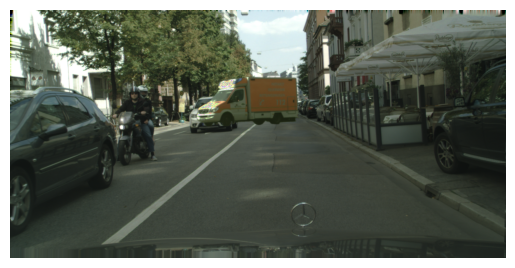

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],  # OOD (red)
    255: [0, 0, 0]   # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(fishyscapes["data"]["mask"][0])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(fishyscapes["data"]["image"][0])
plt.imshow(image)
plt.axis('off')
plt.show()

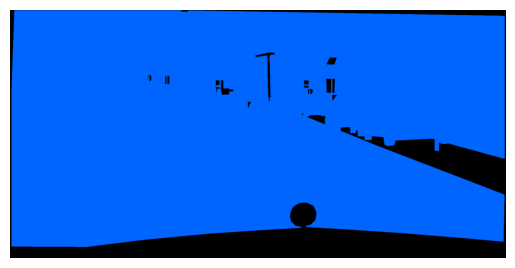

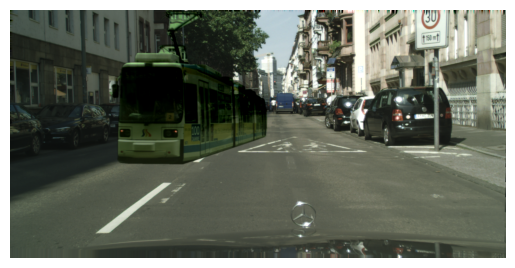

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],  # OOD (red)
    255: [0, 0, 0]   # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(fishyscapes["data"]["mask"][1])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(fishyscapes["data"]["image"][1])
plt.imshow(image)
plt.axis('off')
plt.show()

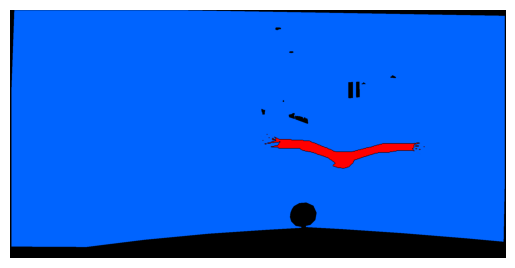

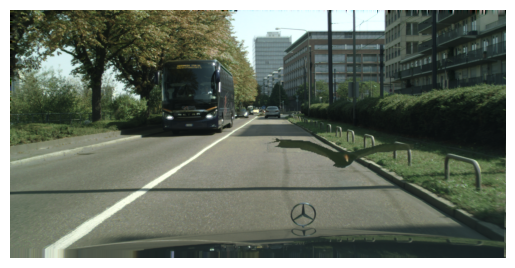

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],  # OOD (red)
    255: [0, 0, 0]   # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(fishyscapes["data"]["mask"][2])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(fishyscapes["data"]["image"][2])
plt.imshow(image)
plt.axis('off')
plt.show()

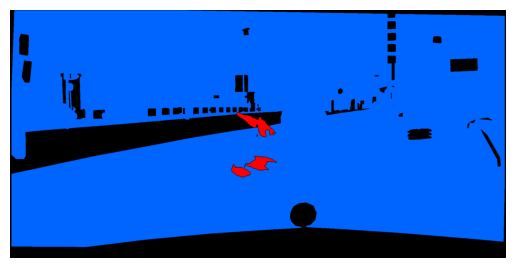

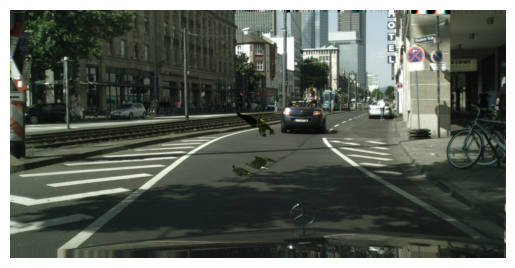

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],  # OOD (red)
    255: [0, 0, 0]   # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(fishyscapes["data"]["mask"][3])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(fishyscapes["data"]["image"][3])
plt.imshow(image)
plt.axis('off')
plt.show()

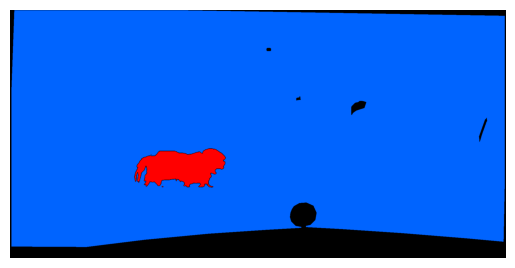

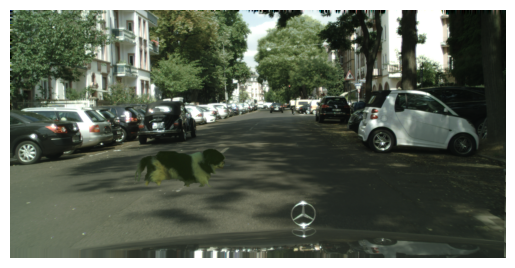

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],  # OOD (red)
    255: [0, 0, 0]   # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(fishyscapes["data"]["mask"][4])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(fishyscapes["data"]["image"][4])
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Define the color map
palette = np.array([
    (  255,  100,  0), # ID
    (0, 0, 255), # OOD
    (  0,  0, 0),  # Background
])

In [ ]:
# Plot the preds
import matplotlib.pyplot as plt

def plot_predictions(images, ground_truth_mask, predicted_mask, palette):
    palette = np.array(palette)
    num_images = len(images)

    cols = 3  # 3 cols: original image, gt mask, segmentation mask

    # Create a subplot with num_images rows and 3 columns, make it 5 if you want classes
    fig, axes = plt.subplots(num_images, cols, figsize=(15, 5*num_images))
    print(axes.shape)

    # Ensure axes is always 2D
    if num_images == 1:
        axes = np.expand_dims(axes, axis=0)

    # Titles
    axes[0, 0].set_title("Original Image")
    axes[0, 1].set_title("Ground Truth Mask")
    axes[0, 2].set_title("Predicted Mask")

    for i, (img, gt_mask, pred_mask) in enumerate(zip(images, ground_truth_mask, predicted_mask)):
        color_seg = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8) # height, width, 3
        color_seg_gt = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8)
        for label, color in enumerate(palette):
            color_seg[pred_mask == label, :] = color
            color_seg_gt[gt_mask == label, :] = color

        # Convert to BGR
        color_seg = color_seg[..., ::-1]
        color_seg_gt = color_seg_gt[..., ::-1]

        # Show image + mask of prediction
        img_pred = np.array(img) * 0.5 + color_seg * 0.5
        img_pred = img_pred.astype(np.uint8)

        # Show image + mask of gt
        img_gt = np.array(img) * 0.5 + color_seg_gt * 0.5
        img_gt = img_gt.astype(np.uint8)

        # Plot original image
        axes[i, 0].imshow(img)
        # Plot ground truth mask
        axes[i, 1].imshow(img_gt)
        # Plot predicted mask
        axes[i, 2].imshow(img_pred)

    for ax in axes.flat:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

(3,)


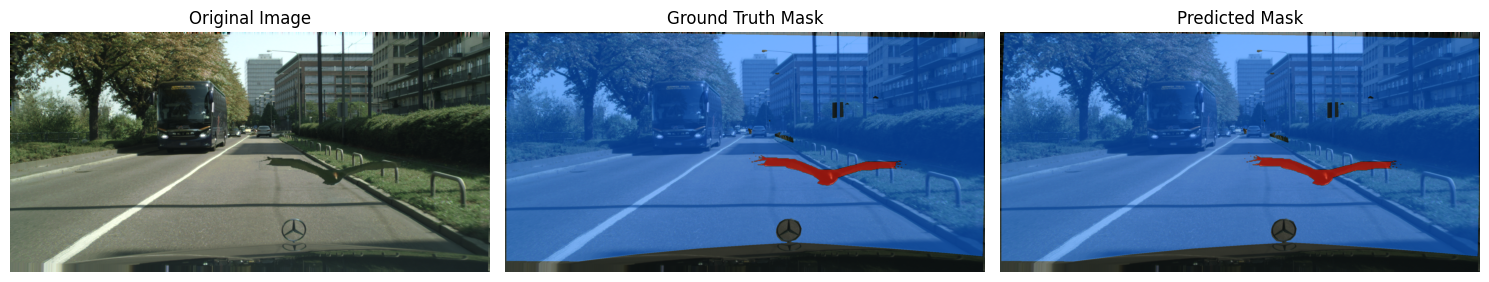

In [ ]:
plot_predictions(images=[np.array(fishyscapes["data"][2]["image"])],
                 ground_truth_mask=[np.array(fishyscapes["data"][2]["mask"])],
                 predicted_mask=[np.array(fishyscapes["data"][2]["mask"])],  # annotation_labelids for now
                 palette=palette)

In [ ]:
np.unique(np.array(fishyscapes["data"][2]["mask"]))

array([  0,   1, 255], dtype=uint8)

(3,)


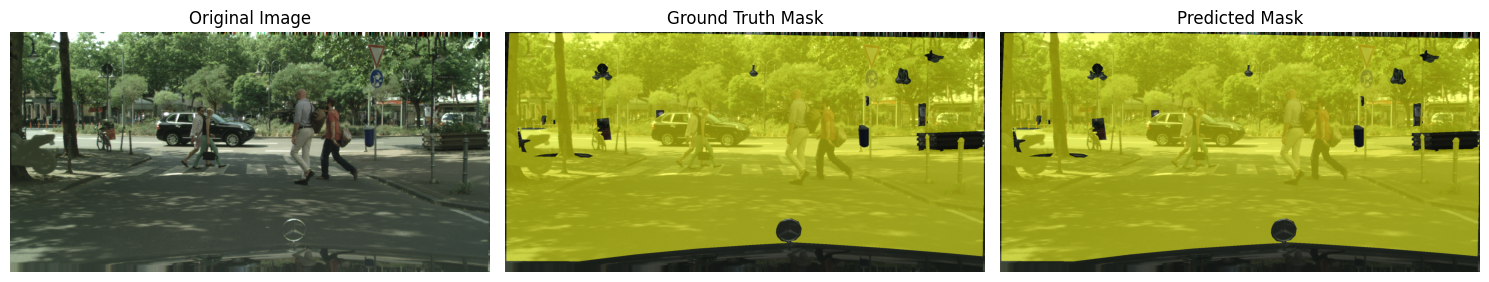

In [ ]:
palette = np.array(
    [[0, 255, 255], #bg
    [128,  64, 128], #objct like dog
    [0, 0, 142]]) # remaining objects

plot_predictions(images=[np.array(fishyscapes["data"][8]["image"])],
                 ground_truth_mask=[np.array(fishyscapes["data"][8]["mask"])],
                 predicted_mask=[np.array(fishyscapes["data"][8]["mask"])],  # annotation_labelids for now
                 palette=palette)

In [ ]:
np.unique(np.array(fishyscapes["data"][8]["mask"])), fishyscapes["data"][8]["image_name"]

(array([  0, 255], dtype=uint8), '0017_frankfurt_000001_065850')

(3,)


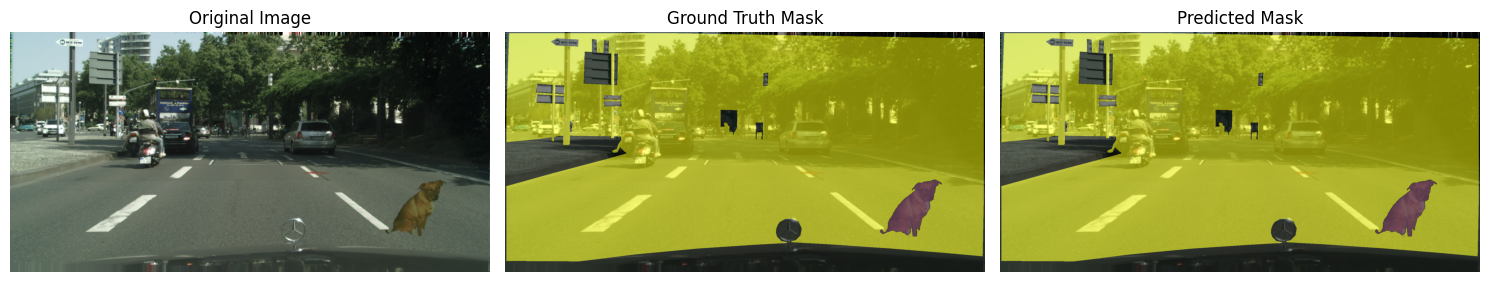

In [ ]:
# palette = np.array(
#     [[  0,   0,   0],
#     [128,  64, 128],
#     [  0,   0, 142]])

palette = np.array(
    [[0, 255, 255], #bg
    [128,  64, 128], #objct like dog
    [0, 0, 142]]) # remaining objects

plot_predictions(images=[np.array(fishyscapes["data"][15]["image"])],
                 ground_truth_mask=[np.array(fishyscapes["data"][15]["mask"])],
                 predicted_mask=[np.array(fishyscapes["data"][15]["mask"])],  # annotation_labelids for now
                 palette=palette)

In [ ]:
np.unique(np.array(fishyscapes["data"][15]["mask"])), fishyscapes["data"][15]["image_name"]

(array([  0,   1, 255], dtype=uint8), '0015_frankfurt_000000_017476')

In [ ]:
palette

array([[  0,   0,   0],
       [128,  64, 128],
       [  0,   0, 142]])

In [ ]:
import torch

# a = torch.randn(1800, 1024, 2048) # 14GB

In [ ]:
# b = torch.randn(1800, 1024, 2048) # 14GB

In [ ]:
# c = a+b # 14GB